# Coca Cola Stock Price

[*********************100%%**********************]  1 of 1 completed


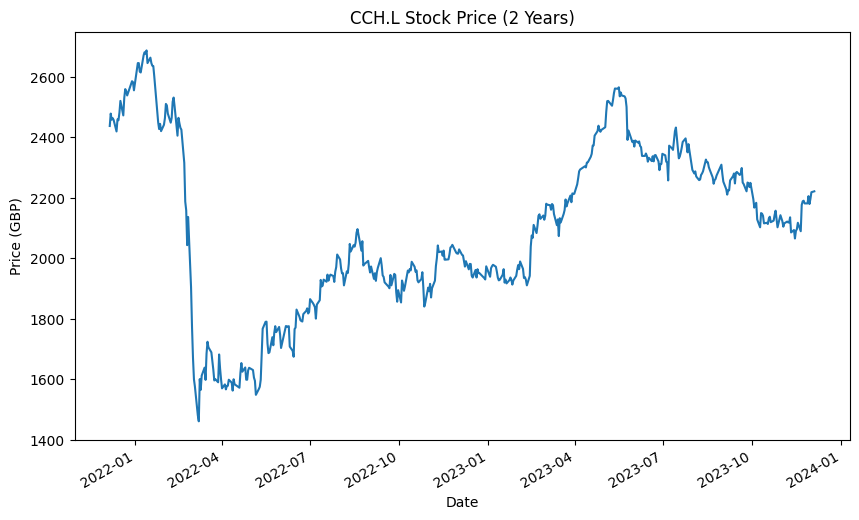

Descriptive Statistics for Coca Cola HBC AG Stock (CCH.L):
count     502.000000
mean     2095.060757
std       276.205263
min      1460.500000
25%      1926.500000
50%      2094.500000
75%      2314.250000
max      2687.000000
Name: Close, dtype: float64
Annualized Average Return: -0.82%
Annualized Standard Deviation: 27.70%


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import norm
import math

# Set the ticker and time period
ticker = 'CCH.L'
end_date = datetime.today()
start_date = end_date - timedelta(days=2*365)  # Two years from today

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Plot the closing prices
data['Close'].plot(title=f'{ticker} Stock Price (2 Years)', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.show()

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate annualized average return
avg_daily_return = data['Daily Return'].mean()
annualized_avg_return = (1 + avg_daily_return) ** 252 - 1  # 252 trading days in a year

# Calculate annualized standard deviation
annualized_std_dev = data['Daily Return'].std() * np.sqrt(252)

# 'Close' prices
close_prices = data['Close']

# Calculate descriptive statistics
stats = close_prices.describe()

# Print the statistics
print("Descriptive Statistics for Coca Cola HBC AG Stock (CCH.L):")
print(stats)


print(f"Annualized Average Return: {annualized_avg_return * 100:.2f}%")
print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")


# Log Return Coca-Cola

[*********************100%%**********************]  1 of 1 completed


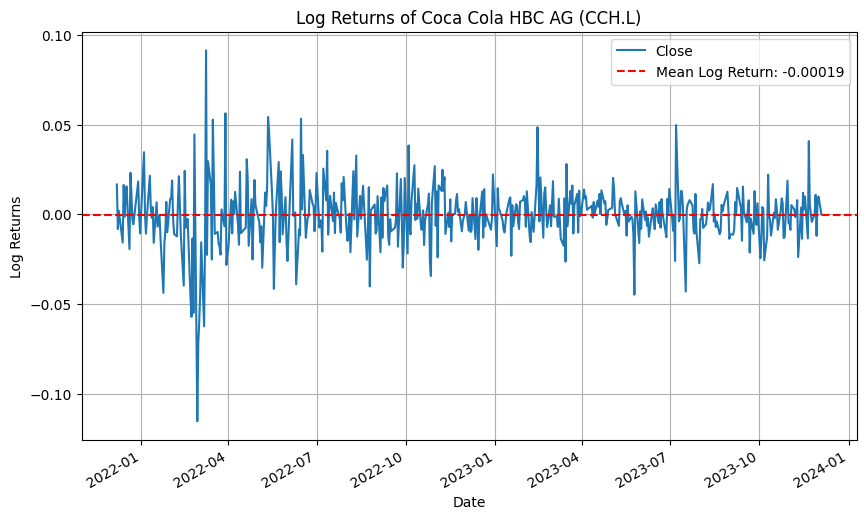

Mean Log Return: -0.00018794787567843403


In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for Coca Cola HBC AG
ticker = 'CCH.L'
data = yf.download(ticker, period='2y')

# Calculate the log returns
log_returns = np.log(data['Close'] / data['Close'].shift(1))

# Drop the NaN values created by the shift operation
log_returns = log_returns.dropna()

# Calculate the mean of log returns
mean_log_return = log_returns.mean()

# Plotting the log returns
plt.figure(figsize=(10, 6))
log_returns.plot()
plt.axhline(mean_log_return, color='red', linestyle='--', label=f'Mean Log Return: {mean_log_return:.5f}')
plt.title('Log Returns of Coca Cola HBC AG (CCH.L)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

# Print the mean log return
print(f"Mean Log Return: {mean_log_return}")


# FTSE Stock Price

[*********************100%%**********************]  1 of 1 completed


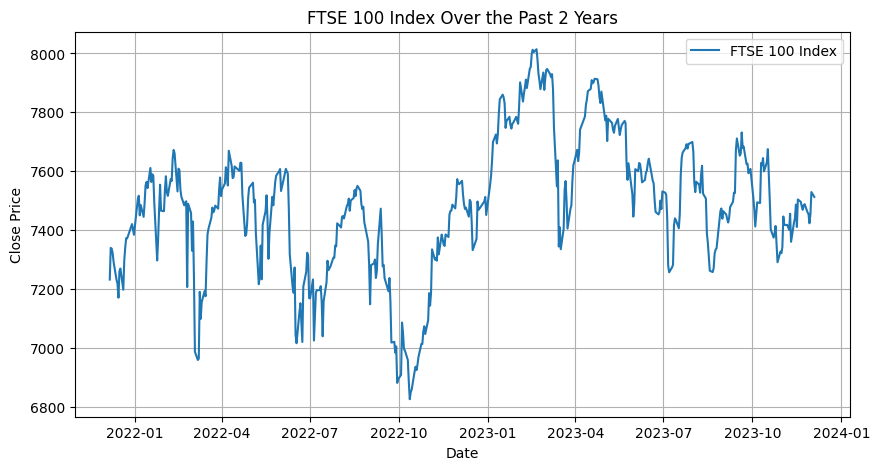

Annualized Average Return: 1.93%
Annualized Standard Deviation: 14.26%


/var/folders/sb/y8bj5dwj35z3pxd7_0hbxrrm0000gn/T/ipykernel_14862/847640131.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = ftse_data['Close'][-1] / ftse_data['Close'][0] - 1


In [16]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# Set the ticker symbol and the date range
ticker_symbol = "^FTSE"
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)  # approximately 2 years

# Fetch historical data
ftse_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Check if data is retrieved
if ftse_data.empty:
    print("No data retrieved for FTSE 100 Index. Please check the ticker symbol and try again.")
else:
    # Plotting the data
    plt.figure(figsize=(10, 5))
    plt.plot(ftse_data['Close'], label='FTSE 100 Index')
    plt.title('FTSE 100 Index Over the Past 2 Years')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate daily returns
    ftse_data['Daily Return'] = ftse_data['Close'].pct_change()

    # Calculate annualized average return (CAGR)
    total_return = ftse_data['Close'][-1] / ftse_data['Close'][0] - 1
    years = (ftse_data.index[-1] - ftse_data.index[0]).days / 365.25
    annualized_return = (1 + total_return) ** (1 / years) - 1

    # Calculate annualized standard deviation
    annualized_std_dev = np.std(ftse_data['Daily Return'].dropna()) * np.sqrt(252)  # Assuming 252 trading days in a year

    print(f"Annualized Average Return: {annualized_return * 100:.2f}%")
    print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")


# Log return FTSE 100

[*********************100%%**********************]  1 of 1 completed
Mean Log Return for the past 2 years: 0.00011094743482488304


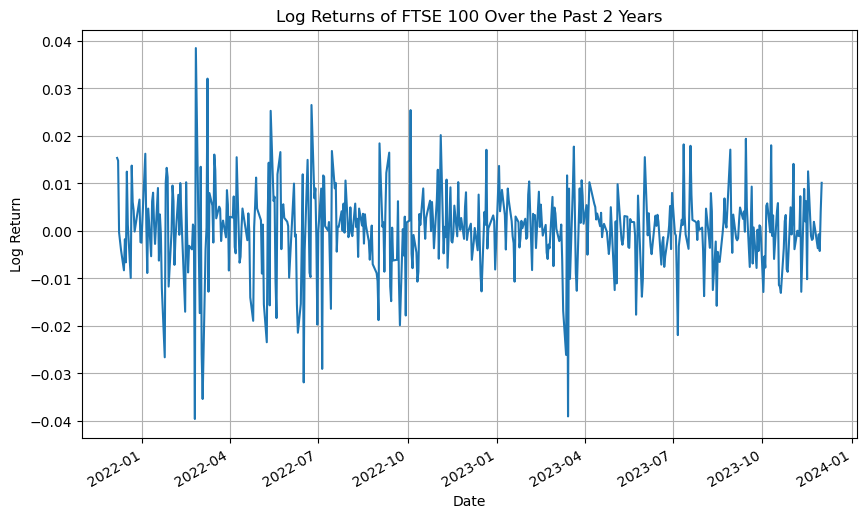

In [ ]:


# Function to download data and calculate log returns
def get_log_returns(ticker, start_date, end_date):
    # Download historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate log returns
    log_returns = np.log(data['Close'] / data['Close'].shift(1))
    return log_returns

# Define the ticker symbol for FTSE 100
ticker_symbol = "^FTSE"

# Define the time period (last 2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Get log returns
log_returns = get_log_returns(ticker_symbol, start_date, end_date)

# Calculate mean log return
mean_log_return = log_returns.mean()
print("Mean Log Return for the past 2 years:", mean_log_return)

# Plotting the log returns
plt.figure(figsize=(10, 6))
log_returns.plot()
plt.title("Log Returns of FTSE 100 Over the Past 2 Years")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()


# Black Scholes

[*********************100%%**********************]  1 of 1 completed
Call Option Price: 143.25657672837747
Put Option Price: 102.44071106465378


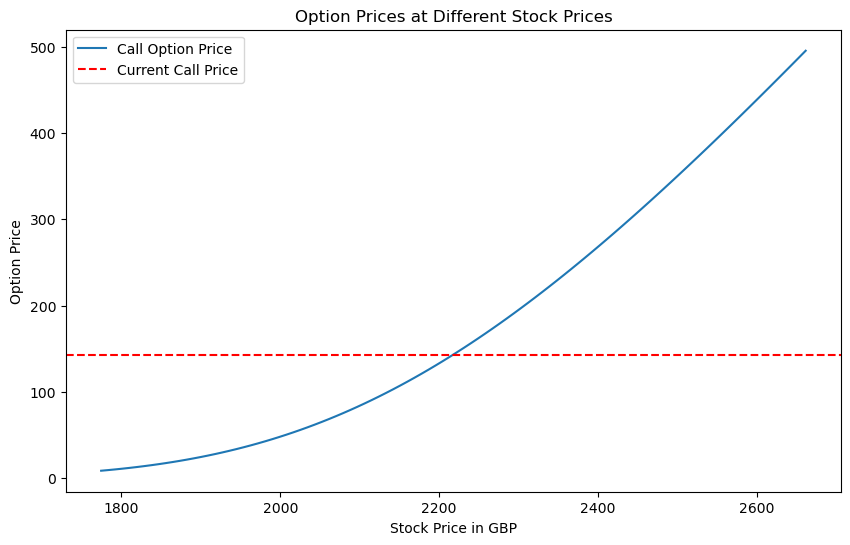

In [5]:
import numpy as np
import scipy.stats as si
import yfinance as yf

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the stock
    :param option_type: 'call' or 'put'
    :return: Option price
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate option price
    if option_type == 'call':
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# usage
ticker = 'CCH.L'
data = yf.download(ticker, period="1d")
current_stock_price = data['Close'][-1]  # Latest closing price

# Inputs for the Black-Scholes model
strike_price = 2200  # strike price
time_to_expiration = 0.25  # 3 months until expiration
risk_free_rate = 0.0417  # risk-free rate (4.17%) UK Gilt 10 Year Yield
volatility = 0.278  # volatility (27.8%)

# Calculate option price
call_option_price = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'call')
put_option_price = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'put')

print(f"Call Option Price: {call_option_price}")
print(f"Put Option Price: {put_option_price}")

# Plotting
S_range = np.linspace(80, 120, 100) * current_stock_price / 100  # Range of stock prices for plotting
call_prices = [black_scholes(S, strike_price, time_to_expiration, risk_free_rate, volatility, 'call') for S in S_range]
put_prices = [black_scholes(S, strike_price, time_to_expiration, risk_free_rate, volatility, 'put') for S in S_range]

plt.figure(figsize=(10, 6))
plt.plot(S_range, call_prices, label='Call Option Price')
plt.axhline(y=call_option_price, color='r', linestyle='--', label='Current Call Price')
plt.title('Option Prices at Different Stock Prices')
plt.xlabel('Stock Price in GBP')
plt.ylabel('Option Price')
plt.legend()
plt.show()



In [6]:
import numpy as np
import scipy.stats as si
import yfinance as yf
import matplotlib.pyplot as plt

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price and return d1 and d2.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the stock
    :param option_type: 'call' or 'put'
    :return: Option price, d1, d2
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate option price
    if option_type == 'call':
        option_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price, d1, d2

# usage
ticker = 'CCH.L'
data = yf.download(ticker, period="1d")
current_stock_price = data['Close'][-1]  # Latest closing price

# Inputs for the Black-Scholes model
strike_price = 2200  # strike price
time_to_expiration = 0.25  # 3 months until expiration
risk_free_rate = 0.0417  # risk-free rate (4.17%) UK Gilt 10 Year Yield
volatility = 0.278  # volatility (27.8%)

# Calculate option price and d1, d2
call_option_price, call_d1, call_d2 = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'call')
put_option_price, put_d1, put_d2 = black_scholes(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'put')

print(f"Call Option Price: {call_option_price}, d1: {call_d1}, d2: {call_d2}")
print(f"Put Option Price: {put_option_price}, d1: {put_d1}, d2: {put_d2}")




[*********************100%%**********************]  1 of 1 completed
Call Option Price: 143.25657672837747, d1: 0.20312250765399445, d2: 0.06412250765399444
Put Option Price: 102.44071106465378, d1: 0.20312250765399445, d2: 0.06412250765399444


# Greeks

In [1]:
import numpy as np
import scipy.stats as si
import yfinance as yf

def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Black-Scholes Greeks: Delta, Gamma, Theta, Vega.

    :param S: Current stock price
    :param K: Strike price
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the stock
    :param option_type: 'call' or 'put'
    :return: A dictionary containing the Greeks
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        delta = si.norm.cdf(d1)
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == 'put':
        delta = -si.norm.cdf(-d1)
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * si.norm.pdf(d1) * np.sqrt(T)

    return {
        'delta': delta,
        'gamma': gamma,
        'theta': theta / 365,  # Annualize theta
        'vega': vega / 100  # Adjust vega
    }

# usage
ticker = 'CCH.L'
data = yf.download(ticker, period="1d")
current_stock_price = data['Close'][-1]  # Latest closing price

# Inputs for the Black-Scholes model
strike_price = 2200  # Example strike price
time_to_expiration = 0.25  # 3 months until expiration
risk_free_rate = 0.0417  # risk-free rate (1%) UK Gilt 10 Year Yield
volatility = 0.278  # volatility (27.8%)

# Calculate Greeks
greeks = black_scholes_greeks(current_stock_price, strike_price, time_to_expiration, risk_free_rate, volatility, 'call')

print("Greeks for the Call Option:")
print(f"Delta: {greeks['delta']}")
print(f"Gamma: {greeks['gamma']}")
print(f"Theta: {greeks['theta']}")
print(f"Vega: {greeks['vega']}")


## Delta

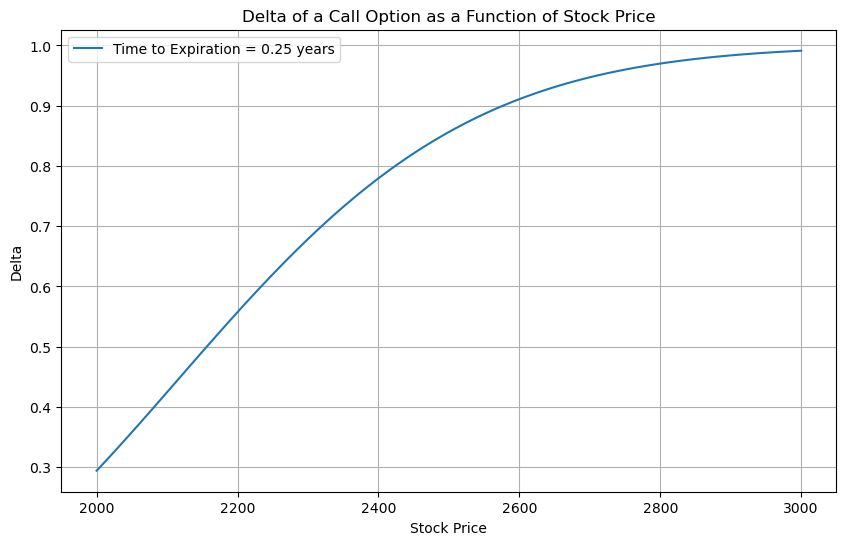

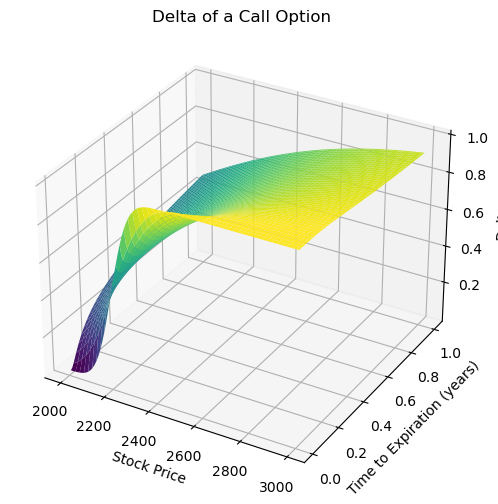

Delta for call option with Stock Price = 2218, Strike Price = 2200, Time to Expiration = 0.25 years, Risk-Free Rate = 0.0417, and Volatility = 0.278 is: 0.5805
Delta for put option with Stock Price = 2218, Strike Price = 2200, Time to Expiration = 0.25 years, Risk-Free Rate = 0.0417, and Volatility = 0.278 is: -0.4195


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Delta
def black_scholes_delta(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = si.norm.cdf(d1)
    elif option_type == 'put':
        delta = -si.norm.cdf(-d1)
    return delta

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility

S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
delta_2d = black_scholes_delta(S, K, T_fixed, r, sigma, 'call')
plt.figure(figsize=(10, 6))
plt.plot(S, delta_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Delta of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
delta_3d = black_scholes_delta(S_mesh, K, T_mesh, r, sigma, 'call')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, delta_3d, cmap='viridis')
ax.set_title('Delta of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Delta')
plt.show()

# Function to print Delta for specific parameters
def print_delta(S, K, T, r, sigma, option_type='call'):
    delta = black_scholes_delta(S, K, T, r, sigma, option_type)
    print(f"Delta for {option_type} option with Stock Price = {S}, Strike Price = {K}, Time to Expiration = {T} years, Risk-Free Rate = {r}, and Volatility = {sigma} is: {delta:.4f}")

# Example values to demonstrate the output
print_delta(2218, K, 0.25, r, sigma, 'call')  # Example for a call option
print_delta(2218, K, 0.25, r, sigma, 'put')   # Example for a put option




## Gamma

Gamma for Stock Price 2218 and Time to Expiration 0.25 years: 0.0012675774347990713


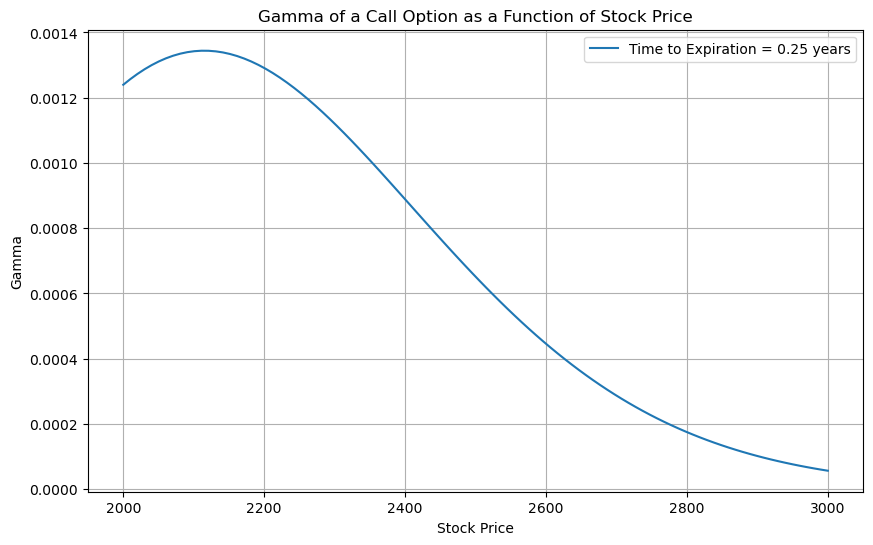

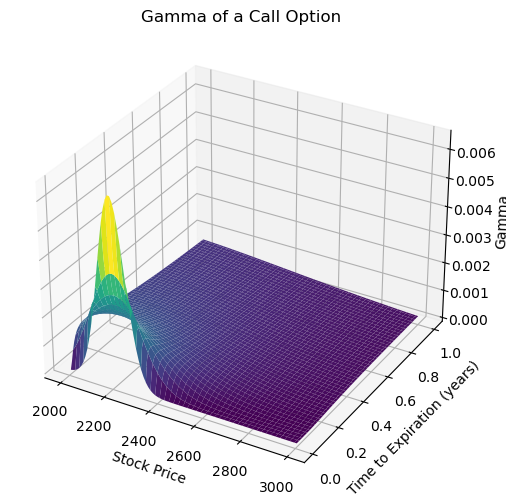

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Gamma
def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility
S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
gamma_2d = black_scholes_gamma(S, K, T_fixed, r, sigma)

# Print Gamma for a specific stock price and time to expiration
specific_S = 2218  # example stock price
specific_gamma = black_scholes_gamma(specific_S, K, T_fixed, r, sigma)
print(f"Gamma for Stock Price {specific_S} and Time to Expiration {T_fixed} years: {specific_gamma}")

plt.figure(figsize=(10, 6))
plt.plot(S, gamma_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Gamma of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
gamma_3d = black_scholes_gamma(S_mesh, K, T_mesh, r, sigma)

# Print all Gamma values (optional, can be a large output)
# print("Gamma values for varying stock prices and times to expiration:")
# print(gamma_3d)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, gamma_3d, cmap='viridis')
ax.set_title('Gamma of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Gamma')
plt.show()


## Theta

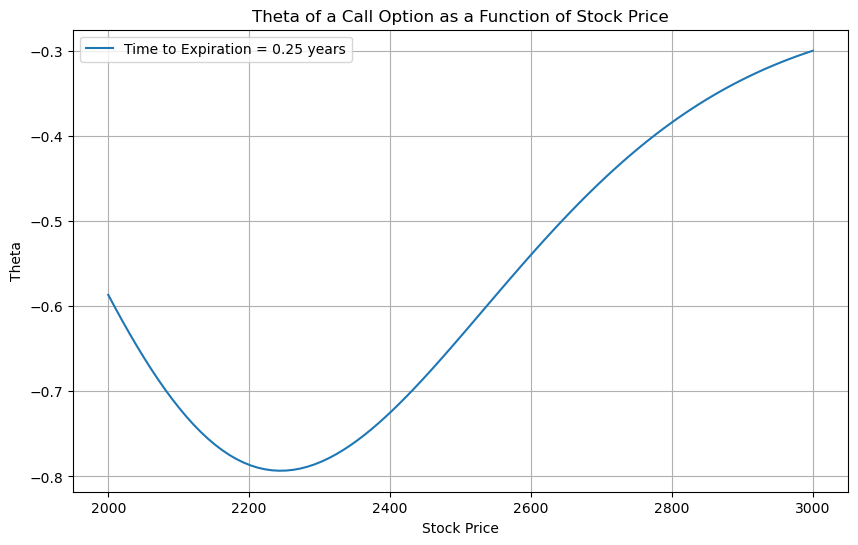

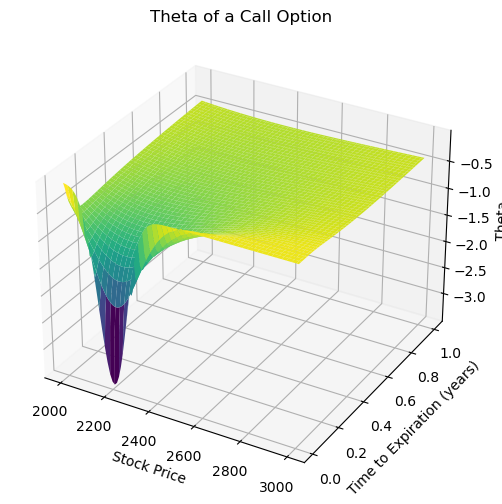

Theta for S=2218, K=2200, T=0.25, r=0.0417, sigma=0.278, option_type='call': -0.7909


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Theta
def black_scholes_theta(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == 'put':
        theta = -(S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return theta / 365  # Annualize theta

# Parameters for Plotting
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility
S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
theta_2d = black_scholes_theta(S, K, T_fixed, r, sigma, 'call')
plt.figure(figsize=(10, 6))
plt.plot(S, theta_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Theta of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Theta')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
theta_3d = black_scholes_theta(S_mesh, K, T_mesh, r, sigma, 'call')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, theta_3d, cmap='viridis')
ax.set_title('Theta of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Theta')
plt.show()

# Calculate and Print Theta for Specific Parameters
S_specific = 2218  # specific stock price
T_specific = 0.25   # specific time to expiration in years
theta_specific = black_scholes_theta(S_specific, K, T_specific, r, sigma, 'call')
print(f"Theta for S={S_specific}, K={K}, T={T_specific}, r={r}, sigma={sigma}, option_type='call': {theta_specific:.4f}")


## Vega

Vega for Stock Price = 2218 and Time to Expiration = 0.25 years: 4.333934940584965


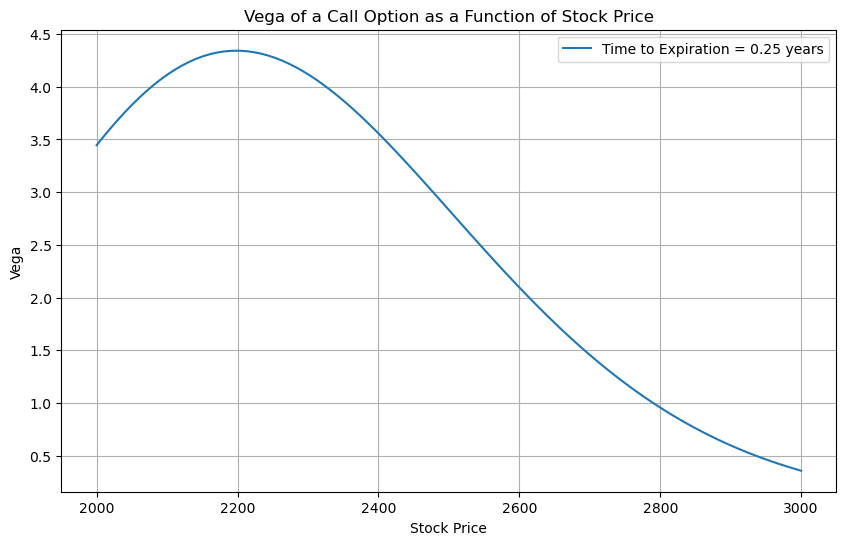

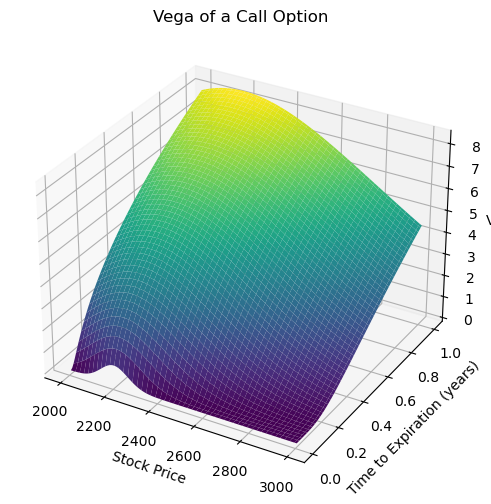

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as si

# Black-Scholes Vega
def black_scholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega = S * si.norm.pdf(d1) * np.sqrt(T)
    return vega / 100  # Adjust vega

# Parameters
K = 2200  # strike price
r = 0.0417  # risk-free rate
sigma = 0.278  # volatility
S = np.linspace(2000, 3000, 100)  # range of stock prices
T = np.linspace(0.01, 1, 100)  # time to expiration in years

# Calculate and print Vega for a specific stock price and time to expiration
specific_S = 2218  # specific stock price
specific_T = 0.25  # specific time to expiration
specific_vega = black_scholes_vega(specific_S, K, specific_T, r, sigma)
print(f"Vega for Stock Price = {specific_S} and Time to Expiration = {specific_T} years: {specific_vega}")

# 2D Plot for a fixed time to expiration
T_fixed = 0.25  # fixed time to expiration
vega_2d = black_scholes_vega(S, K, T_fixed, r, sigma)
plt.figure(figsize=(10, 6))
plt.plot(S, vega_2d, label=f'Time to Expiration = {T_fixed} years')
plt.title('Vega of a Call Option as a Function of Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Vega')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for varying stock price and time to expiration
S_mesh, T_mesh = np.meshgrid(S, T)
vega_3d = black_scholes_vega(S_mesh, K, T_mesh, r, sigma)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S_mesh, T_mesh, vega_3d, cmap='viridis')
ax.set_title('Vega of a Call Option')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration (years)')
ax.set_zlabel('Vega')
plt.show()


# Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


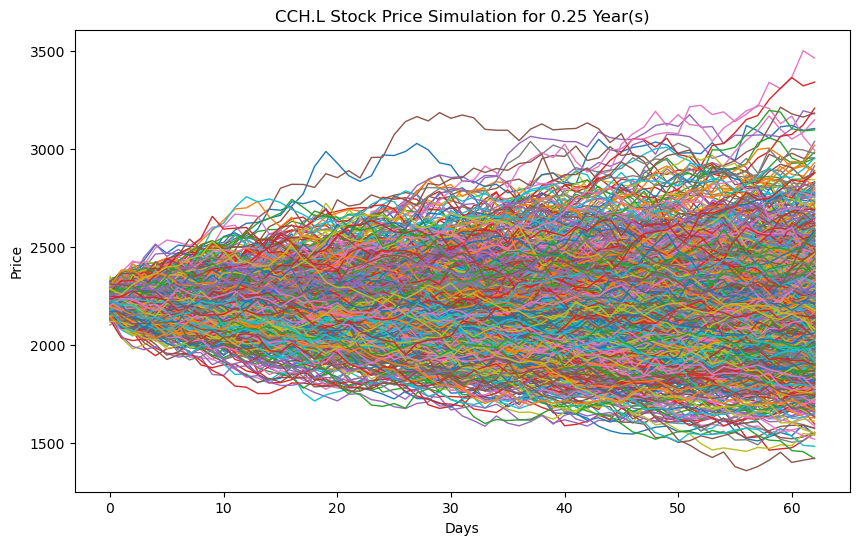

European Call Option Price: 125.64700583286383


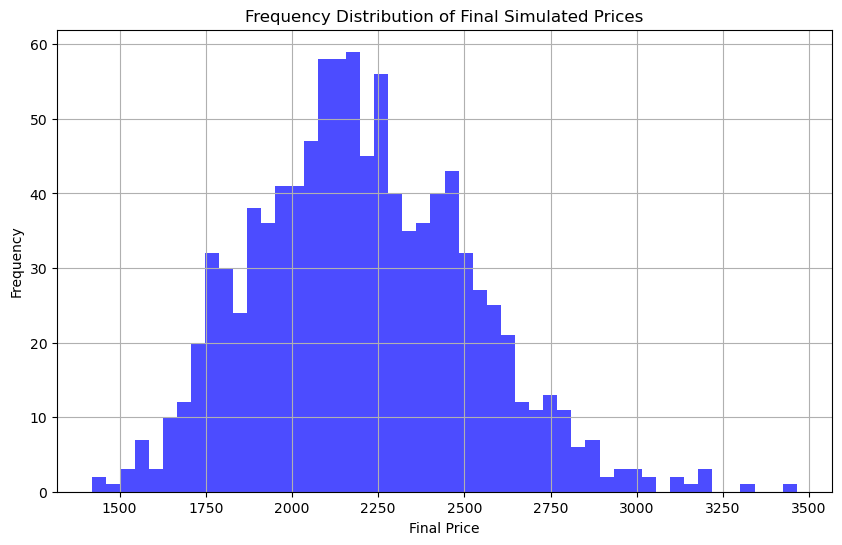

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Coca Cola HBC AG
ticker = 'CCH.L'
data = yf.download(ticker, period='2y')

# Calculate the daily returns
daily_returns = data['Close'].pct_change().dropna()

# Get the mean and standard deviation of daily returns
mean_daily_return = daily_returns.mean()
std_dev_daily_return = daily_returns.std()

# Set up the Monte Carlo parameters
num_simulations = 1000
time_to_expiration = 0.25  # Time to expiration in years
num_days = int(time_to_expiration * 252)  # Convert time to expiration to trading days

# Option parameters
strike_price = 2200  # Example strike price
risk_free_rate = 0.0417  # Example risk-free rate

# Create an empty matrix to hold the simulation results
simulation_results = np.zeros((num_simulations, num_days))

# Run the simulations
np.random.seed(0)  # For reproducibility
for sim in range(num_simulations):
    future_price = data['Close'][-1]
    for day in range(num_days):
        simulated_return = np.random.normal(mean_daily_return, std_dev_daily_return)
        future_price *= (1 + simulated_return)
        simulation_results[sim, day] = future_price

# Plot the simulations
plt.figure(figsize=(10, 6))
plt.plot(simulation_results.T, linewidth=1)
plt.title(f'{ticker} Stock Price Simulation for {time_to_expiration} Year(s)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Calculate the payoffs for a European call option
payoffs = np.maximum(simulation_results[:, -1] - strike_price, 0)

# Calculate the option price
option_price = np.exp(-risk_free_rate * time_to_expiration) * np.mean(payoffs)

print(f"European Call Option Price: {option_price}")

# Plot the frequency distribution of the final simulated prices
final_simulated_prices = simulation_results[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(final_simulated_prices, bins=50, alpha=0.7, color='blue')
plt.title('Frequency Distribution of Final Simulated Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


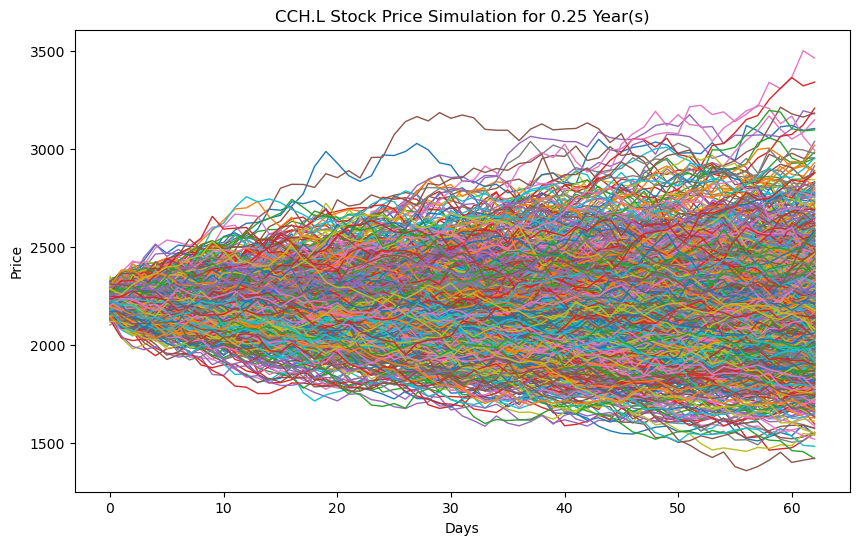

European Call Option Price: 125.64700583286383


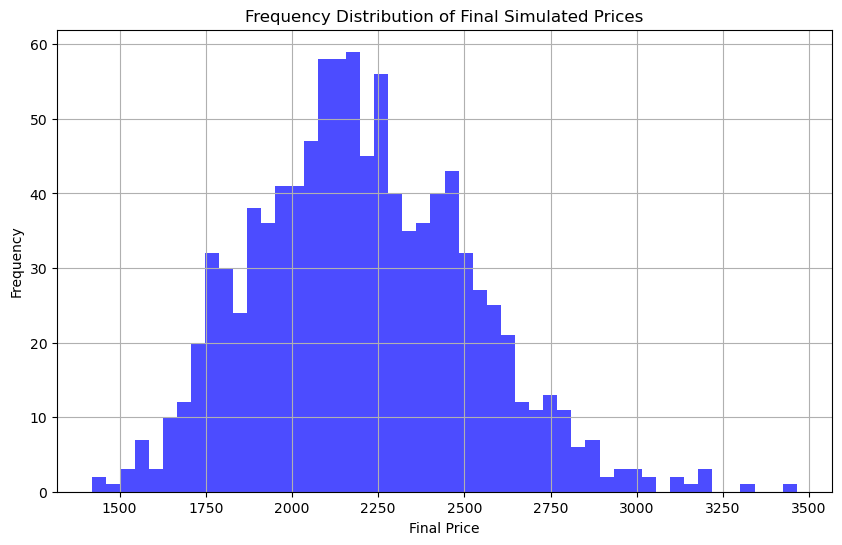

Mean of Final Simulated Prices: 2204.9306872673183
Standard Deviation of Final Simulated Prices: 312.063740801924
Variance of Final Simulated Prices: 97383.7783232904


In [8]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Coca Cola HBC AG
ticker = 'CCH.L'
data = yf.download(ticker, period='2y')

# Calculate the daily returns
daily_returns = data['Close'].pct_change().dropna()

# Get the mean and standard deviation of daily returns
mean_daily_return = daily_returns.mean()
std_dev_daily_return = daily_returns.std()

# Set up the Monte Carlo parameters
num_simulations = 1000
time_to_expiration = 0.25  # Time to expiration in years
num_days = int(time_to_expiration * 252)  # Convert time to expiration to trading days

# Option parameters
strike_price = 2200  # Example strike price
risk_free_rate = 0.0417  # Example risk-free rate

# Create an empty matrix to hold the simulation results
simulation_results = np.zeros((num_simulations, num_days))

# Run the simulations
np.random.seed(0)  # For reproducibility
for sim in range(num_simulations):
    future_price = data['Close'][-1]
    for day in range(num_days):
        simulated_return = np.random.normal(mean_daily_return, std_dev_daily_return)
        future_price *= (1 + simulated_return)
        simulation_results[sim, day] = future_price

# Plot the simulations
plt.figure(figsize=(10, 6))
plt.plot(simulation_results.T, linewidth=1)
plt.title(f'{ticker} Stock Price Simulation for {time_to_expiration} Year(s)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Calculate the payoffs for a European call option
payoffs = np.maximum(simulation_results[:, -1] - strike_price, 0)

# Calculate the option price
option_price = np.exp(-risk_free_rate * time_to_expiration) * np.mean(payoffs)
print(f"European Call Option Price: {option_price}")

# Plot the frequency distribution of the final simulated prices
final_simulated_prices = simulation_results[:, -1]
plt.figure(figsize=(10, 6))
plt.hist(final_simulated_prices, bins=50, alpha=0.7, color='blue')
plt.title('Frequency Distribution of Final Simulated Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print the mean, standard deviation, and variance of the final simulated prices
mean_final_price = np.mean(final_simulated_prices)
std_dev_final_price = np.std(final_simulated_prices)
variance_final_price = np.var(final_simulated_prices)

print(f"Mean of Final Simulated Prices: {mean_final_price}")
print(f"Standard Deviation of Final Simulated Prices: {std_dev_final_price}")
print(f"Variance of Final Simulated Prices: {variance_final_price}")
